<a href="https://colab.research.google.com/github/KGuruPrasad94/DS_challenge_C1/blob/main/DS_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capital One - Data Science Challenge**

# **1.Import and Setup**

In [2]:
# Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import statsmodels.api as sm
import panel as pn
import plotly.graph_objects as go
import scipy as sp
import os
import random
import requests
import zipfile
import io
from datetime import timedelta

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# setting display settings to view full df
pd.set_option('display.max_columns', None)

# **2. Data Load and Exploration**

In [5]:
# load data from github
url = "https://github.com/CapitalOneRecruiting/DS/raw/refs/heads/master/transactions.zip"

response = requests.get(url)
response.raise_for_status()

In [6]:
# unzip file and read with pandas
with zipfile.ZipFile(io.BytesIO(response.content)) as myzip:
    myzip.extractall()

    with myzip.open("transactions.txt") as file:
        df = pd.read_json(file, lines=True)

In [7]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [8]:
# inspecting shape of df
print("Dataset Dimensions: {} x {}".format(df.shape[0], df.shape[1]))

Dataset Dimensions: 786363 x 29


In [9]:
# replacing white space with nan
df = df.replace(r'^\s*$', np.nan, regex=True)

In [10]:
# view dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [11]:
# generate descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307358,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
customerId,786363.0,NaN,NaN,NaN,537232599.461703,255421092.307358,100088067.0,330133277.0,507456073.0,767620004.0,999389635.0
creditLimit,786363.0,NaN,NaN,NaN,10759.464459,11636.17489,250.0,5000.0,7500.0,15000.0,50000.0
availableMoney,786363.0,NaN,NaN,NaN,6250.725369,8880.783989,-1005.63,1077.42,3184.86,7500.0,50000.0
transactionDateTime,786363,776637,2016-12-25T14:04:15,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transactionAmount,786363.0,NaN,NaN,NaN,136.985791,147.725569,0.0,33.65,87.9,191.48,2011.54
merchantName,786363,2490,Uber,25613,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acqCountry,781801,4,US,774709,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchantCountryCode,785639,4,US,778511,NaN,NaN,NaN,NaN,NaN,NaN,NaN
posEntryMode,782309,5,05,315035,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# null values in each column
df.isnull().sum()

,0
accountNumber,0
customerId,0
creditLimit,0
availableMoney,0
transactionDateTime,0
transactionAmount,0
merchantName,0
acqCountry,4562
merchantCountryCode,724
posEntryMode,4054


In [13]:
#checking unique accounts
df.accountNumber.nunique()

5000

In [14]:
#checking unique customers
df.customerId.nunique()

5000

In [15]:
# checking if all account number = customer id
df['accountNumber'].equals(df['customerId'])

True

In [16]:
#checking for duplicate values
df.duplicated().sum()

0

**Intial observations**



1.   6 columns in the datasets doesn't contain any values and there are 5 additional columns with at least 1 null value.
2.   Account number and Customer Id column have 1:1 mapping (ie- they are same) and seems to be redundant.
3. No duplicated rows present in data



# **3. Exploratory Data Analysis (EDA) and Data Inspection**

**3.1 Inspecting the distribution of currency columns**

array([[<Axes: title={'center': 'creditLimit'}>,
        <Axes: title={'center': 'availableMoney'}>],
       [<Axes: title={'center': 'transactionAmount'}>,
        <Axes: title={'center': 'currentBalance'}>]], dtype=object)

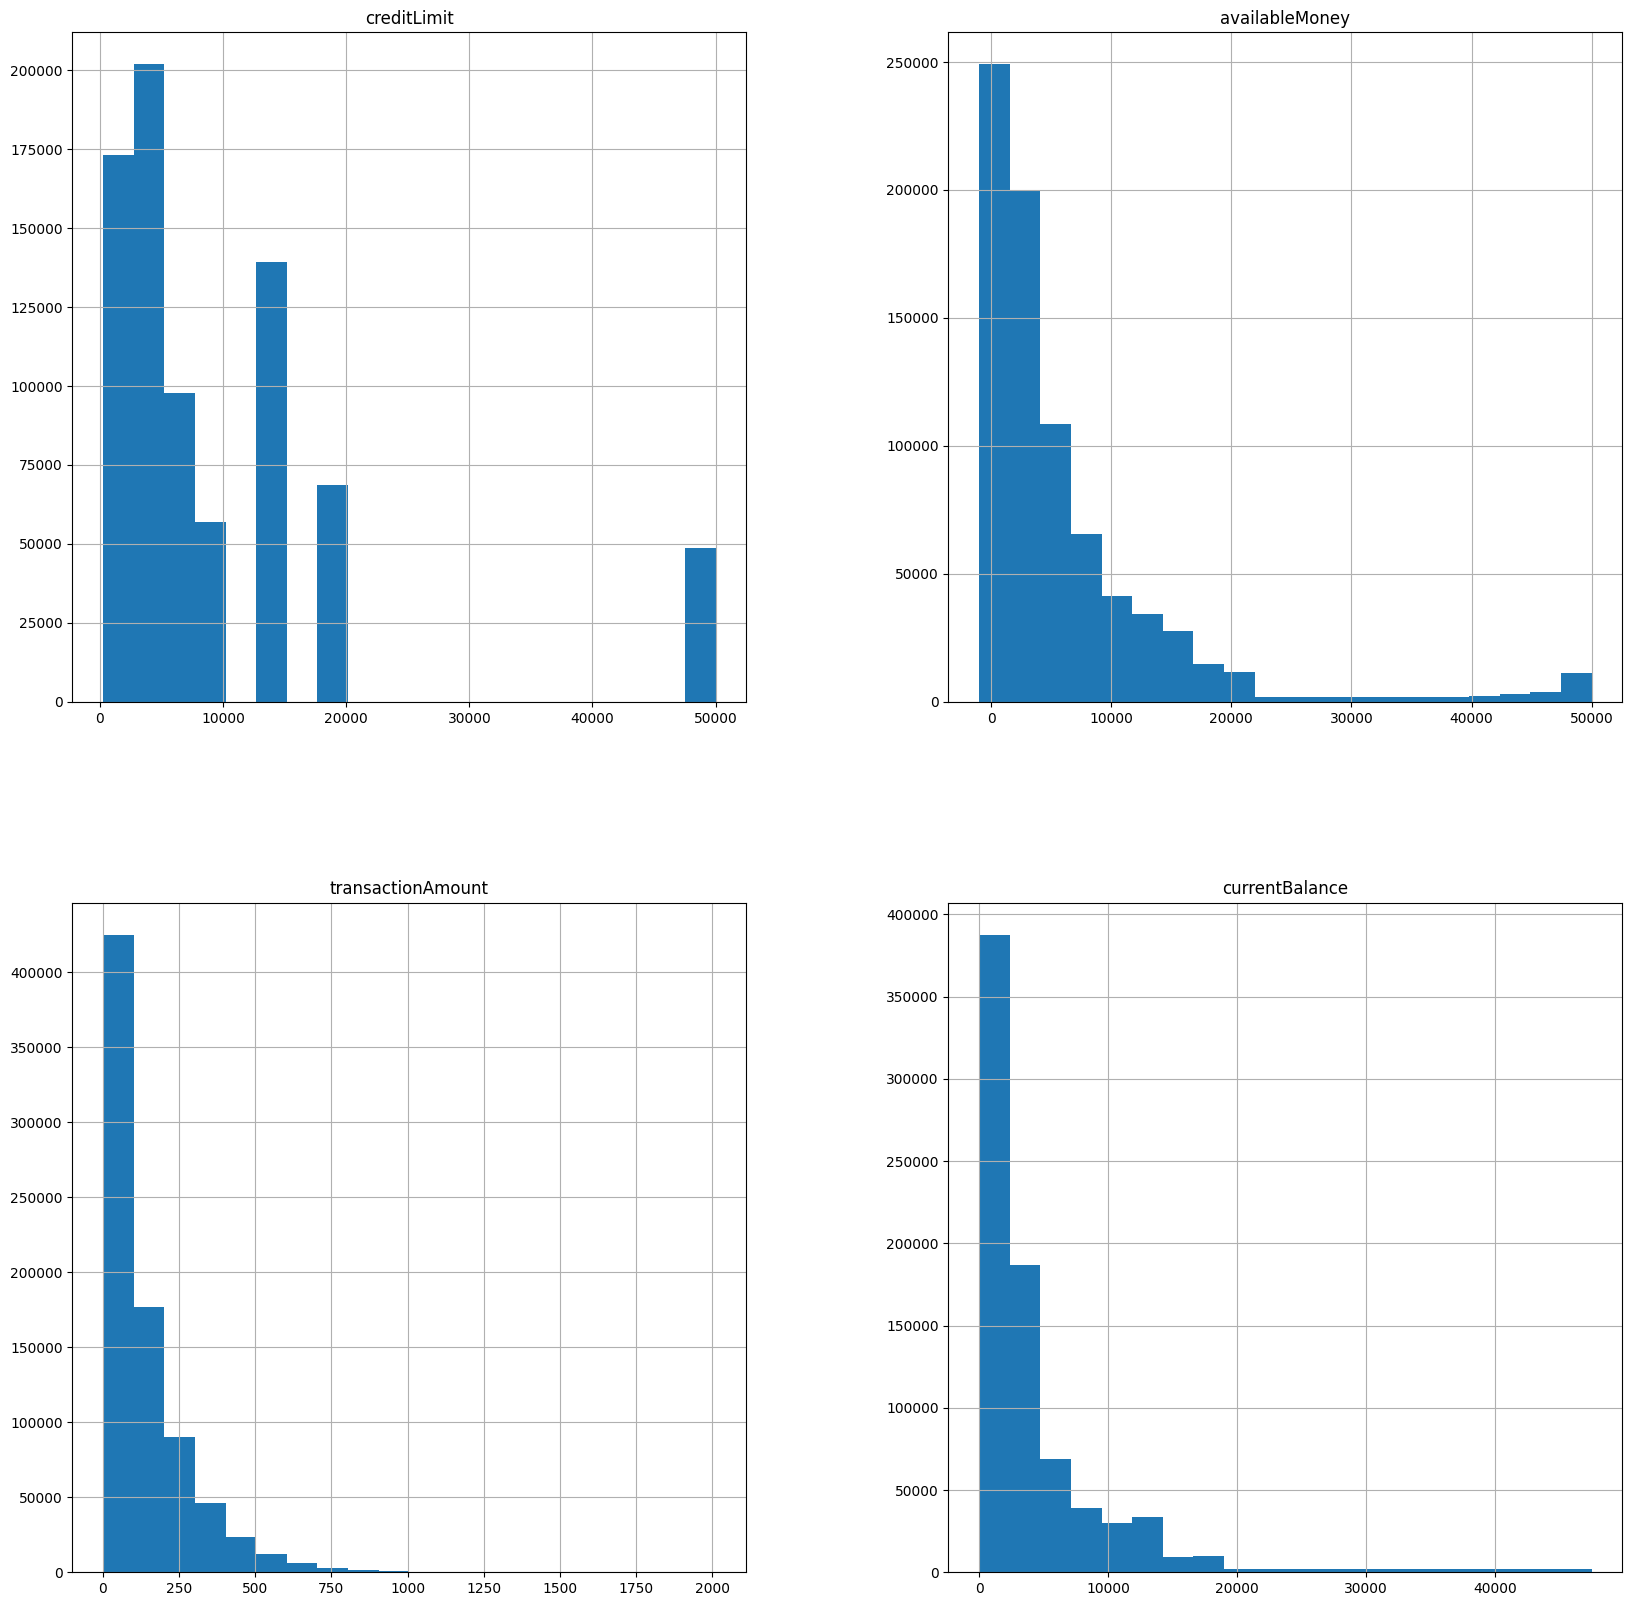

In [17]:
# checking the distribution of currency columns
df[['creditLimit','availableMoney','transactionAmount','currentBalance']].hist(bins = 20 , figsize= (20,20))

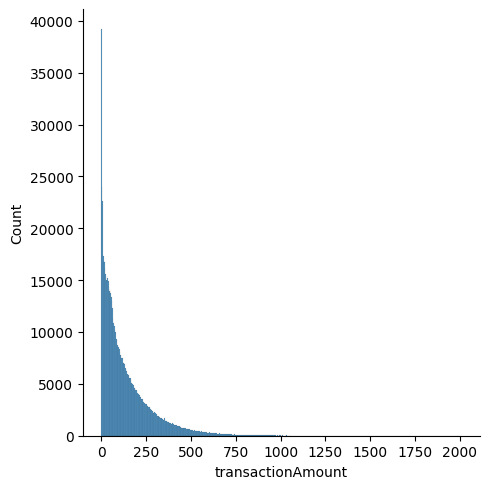

In [18]:
# checking the distribution of "transactionAmount"
sns.displot(df['transactionAmount'])
plt.show()


**Observations:**
1.   Histogram shows a right skewed distribution which is expected in credit card transaction data.
2.   Most transaction amounts are small and are clustered near zero and also has a large tail.

**Approach:**

Need to apply scaling/transformation methods to reduce skewness and bias in the model

In [19]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [20]:
df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

**3.2 Inspecting Location based columns**

In [21]:
#inspecting "acqCountry"
df['acqCountry'].value_counts()

,count
acqCountry,
US,774709
MEX,3130
CAN,2424
PR,1538


In [22]:
#inspecting "merchantCountryCode"
df['merchantCountryCode'].value_counts()

,count
merchantCountryCode,
US,778511
MEX,3143
CAN,2426
PR,1559


In [23]:
# checking the count of equal values in "acqCountry" and "merchantCountryCode" column
equal_count = (df['acqCountry'] == df['merchantCountryCode']).sum()
equal_count

781731

In [24]:
# checking the count of unequal values in "acqCountry" and "merchantCountryCode" column
unequal_count = (df['acqCountry'] != df['merchantCountryCode']).sum()
unequal_count

4632

In [25]:
# calculating fraud rate for each "merchantCountryCode"

country_fraud_summary = df.groupby('merchantCountryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

country_fraud_summary['fraud_rate'] = (country_fraud_summary['total_fraud'] / country_fraud_summary['total_transactions'])*100
country_fraud_summary

,total_transactions,total_fraud,fraud_rate
merchantCountryCode,,,
CAN,2426,56,2.308326
MEX,3143,64,2.036271
PR,1559,27,1.731879
US,778511,12188,1.565553


**Observations:**



1.   Most of the values in Merchant country Code and Acq country seems to match, indicating most of the transactions are local transactions.
2.   Some of values in both columns doesn't match which indicates certain transactions could be cross country / international transactions. However, these columns have null values which could increase the number of mismatches.
3. Countries like Canada and Mexico has a higher fraud rate.



**3.3 Inspecting Merchant Category**

In [26]:
# unique merchantCategoryCode
df['merchantCategoryCode'].nunique()

19

In [27]:
# calculating fraud rate and total transaction volume for each "merchantCategoryCode"
mc_fraud_summary = df.groupby('merchantCategoryCode').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

mc_fraud_summary['fraud_rate'] = (mc_fraud_summary['total_fraud'] / mc_fraud_summary['total_transactions'])*100
mc_fraud_summary = mc_fraud_summary.reset_index()
mc_fraud_summary = mc_fraud_summary.sort_values(by='total_transactions', ascending=False)
mc_fraud_summary = pd.DataFrame(mc_fraud_summary)
mc_fraud_summary

,merchantCategoryCode,total_transactions,total_fraud,fraud_rate
14,online_retail,202156,4938,2.442668
4,fastfood,112138,1074,0.957748
3,entertainment,80098,961,1.199780
5,food,75490,1014,1.343224
13,online_gifts,66238,1606,2.424590
17,rideshare,51136,1272,2.487484
11,hotels,34097,250,0.733202
7,fuel,23910,0,0.000000
18,subscriptions,22901,216,0.943190
1,auto,21651,273,1.260912


Text(0, 0.5, 'MerchantCategory')

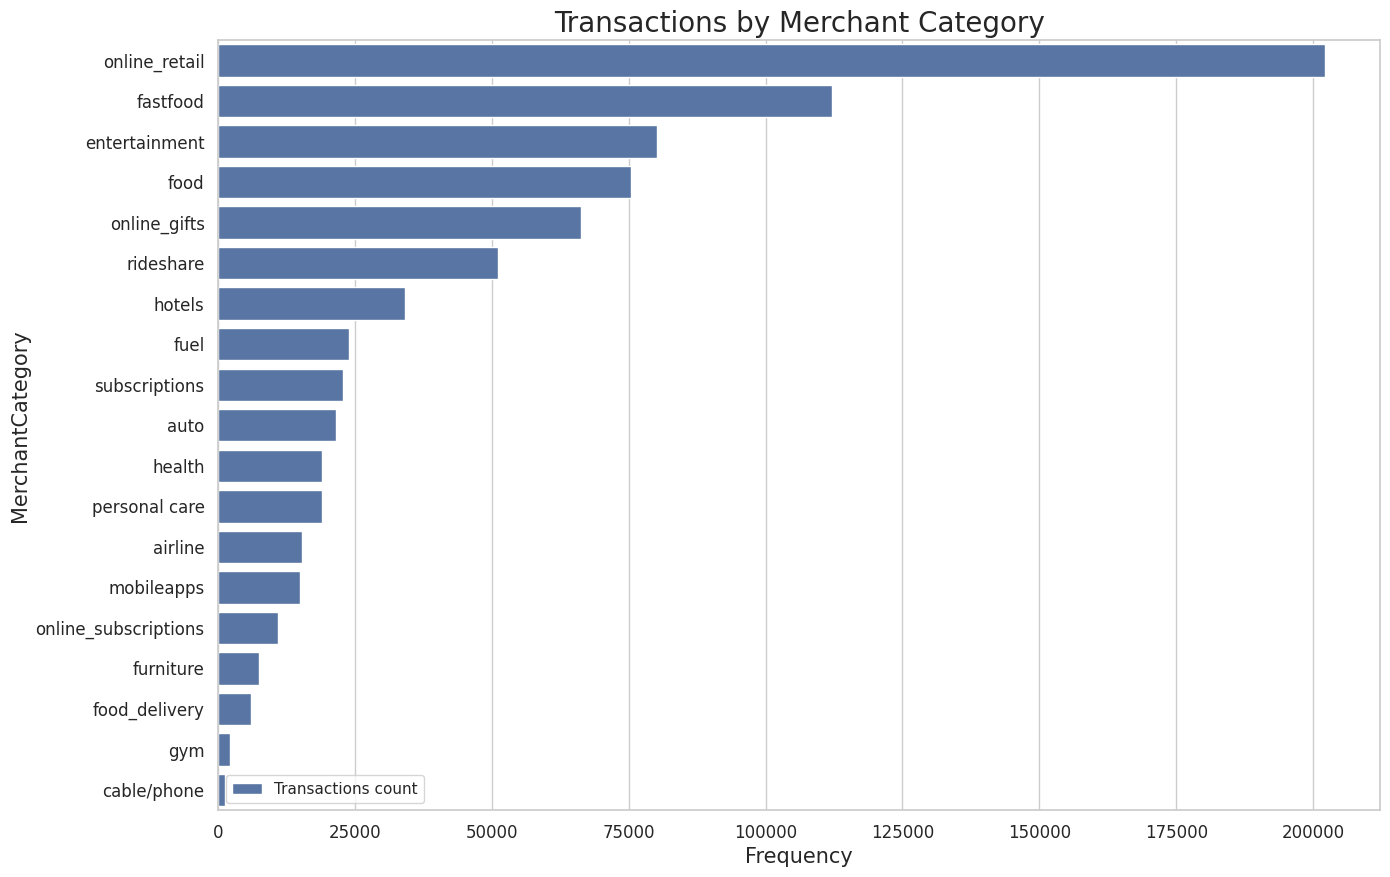

In [28]:
# bar plot: transaction volume by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(y="merchantCategoryCode", x="total_transactions", data=mc_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Transactions by Merchant Category", loc='center',fontsize=20)
plt.xlabel('Frequency',fontsize=15)
plt.ylabel('MerchantCategory',fontsize=15)

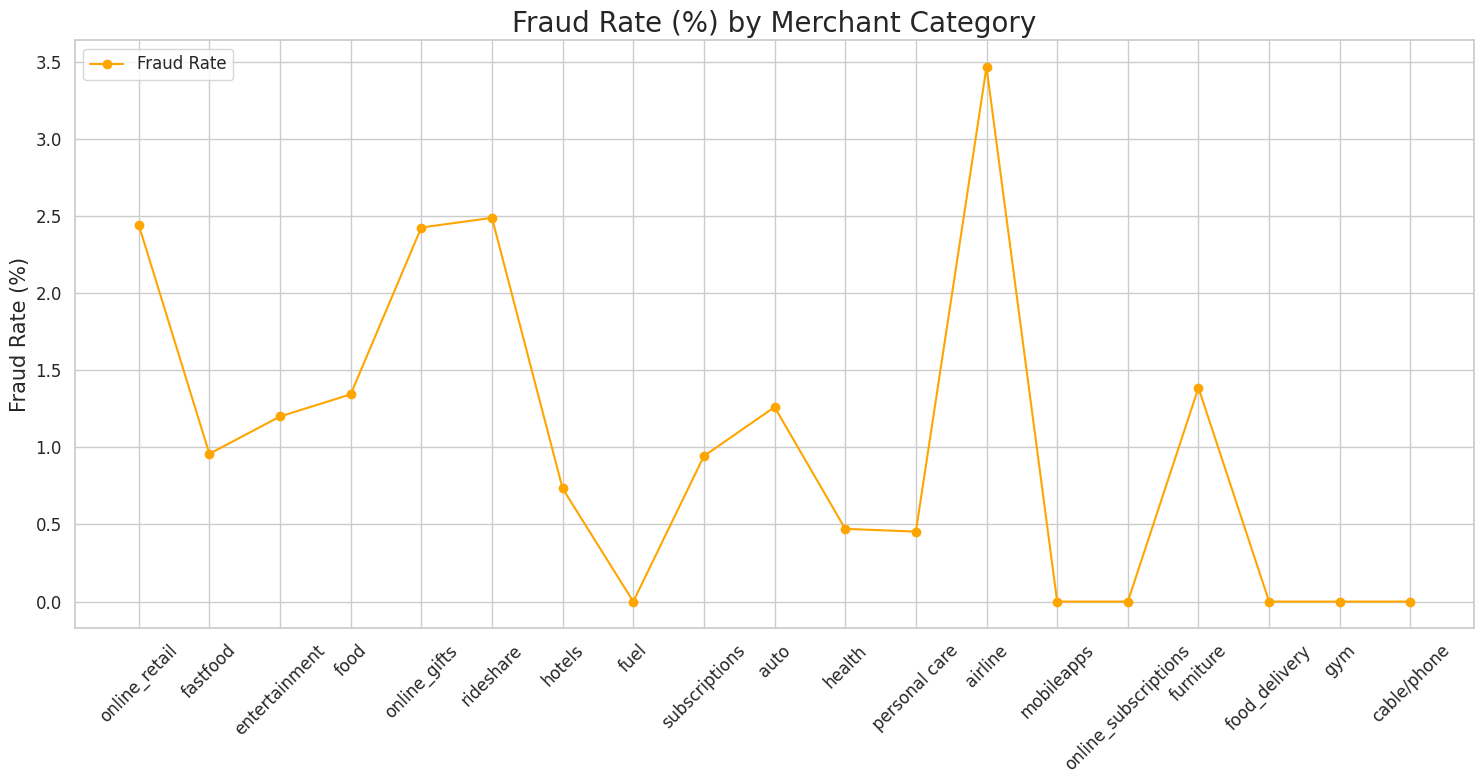

In [29]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# plotting line for fraud rate
ax.plot(mc_fraud_summary["merchantCategoryCode"], mc_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)

plt.title("Fraud Rate (%) by Merchant Category", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**Observations:**



1.   Online Retail shopping, Fast food and Entertainment seems to be the top 3 spending categories for the customers.
2.   Airline transactions seems to have the most number of fraudlent transactions with almost 3.5% of transactions flagged as Fraud. Online retail, Online gifts and rideshare also have higher fraud rate with almost 2.5% of fraud transactions.



**3.4 Inspecting Transaction Type**

In [120]:
tran_df = df['transactionType'].value_counts().reset_index(drop=False)
tran_df.columns=['TransactionType','Frequency']
tran_df = pd.DataFrame(tran_df)
tran_df

,TransactionType,Frequency
0,PURCHASE,745193
1,REVERSAL,20303
2,ADDRESS_VERIFICATION,20169


Text(0, 0.5, 'Frequency')

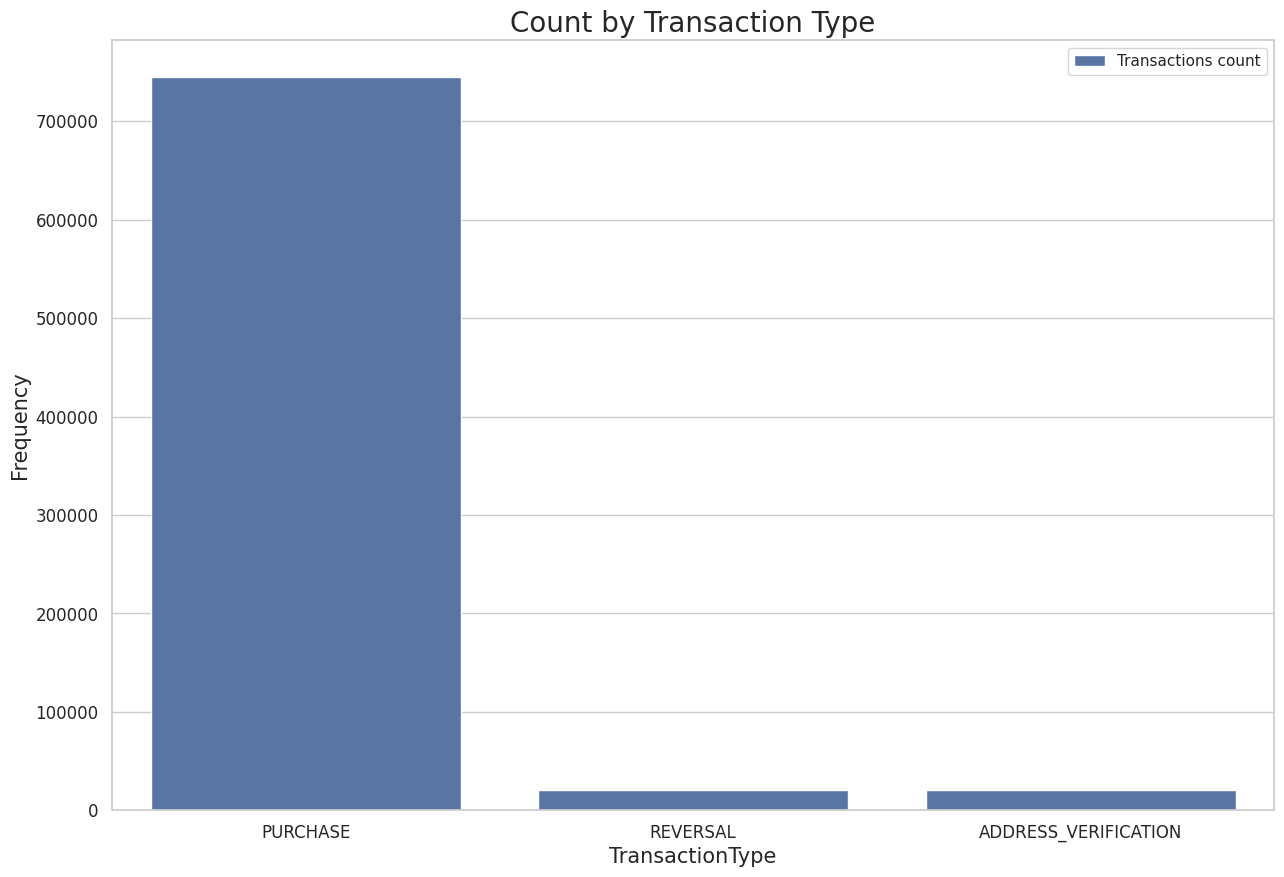

In [31]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(x="TransactionType", y="Frequency", data=tran_df, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Count by Transaction Type", loc='center',fontsize=20)
plt.xlabel('TransactionType',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

In [32]:
# inspecting ADDRESS_VERIFICATION Transaction Type
df[df['transactionType']=='ADDRESS_VERIFICATION'].transactionAmount.sum()

0.0

In [33]:
df[df['transactionType']=='ADDRESS_VERIFICATION'].isFraud.sum()

116

**Observations:**



1.   Few transactions are reversals and few more are address verifications which are different from actual pruchases made by customer.
2. All address verification transactions have transaction amount = 0 indicating it's not a valid transaction.

**Approach:**

These are not actual transactions and hence can be removed from dataset before modelling to reduce noice.



**3.5 Inspecting Credit Limit**

In [34]:
# unique Credit Limit
df['creditLimit'].nunique()

10

In [35]:
# calculating fraud rate and total transaction volume for each "Credit Limit"

cl_fraud_summary = df.groupby('creditLimit').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

cl_fraud_summary['fraud_rate'] = (cl_fraud_summary['total_fraud'] / cl_fraud_summary['total_transactions'])*100
cl_fraud_summary = cl_fraud_summary.reset_index()
cl_fraud_summary = cl_fraud_summary.sort_values(by='creditLimit')
cl_fraud_summary = pd.DataFrame(cl_fraud_summary)
cl_fraud_summary

,creditLimit,total_transactions,total_fraud,fraud_rate
0,250,34025,407,1.196179
1,500,27097,465,1.716057
2,1000,36430,546,1.498765
3,2500,75429,1116,1.479537
4,5000,201863,3527,1.747225
5,7500,97913,1290,1.317496
6,10000,56889,766,1.346482
7,15000,139307,2545,1.826900
8,20000,68629,914,1.331799
9,50000,48781,841,1.724032


Text(0, 0.5, 'Frequency')

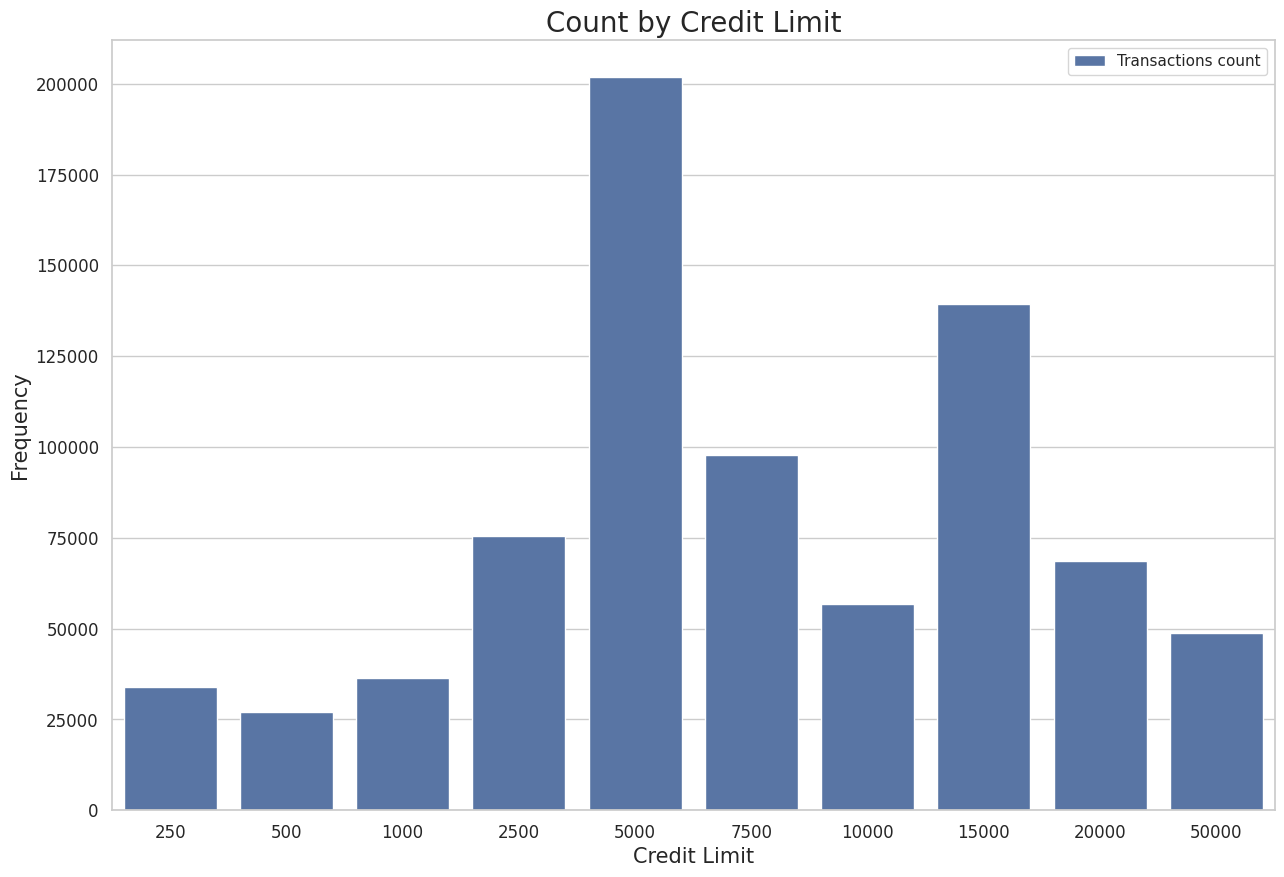

In [36]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# plotting a bar plot
bar1 = sns.barplot(x="creditLimit", y="total_transactions", data=cl_fraud_summary, label="Transactions count")

# formatting tick size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# setting title and label
plt.title("Count by Credit Limit", loc='center',fontsize=20)
plt.xlabel('Credit Limit',fontsize=15)
plt.ylabel('Frequency',fontsize=15)

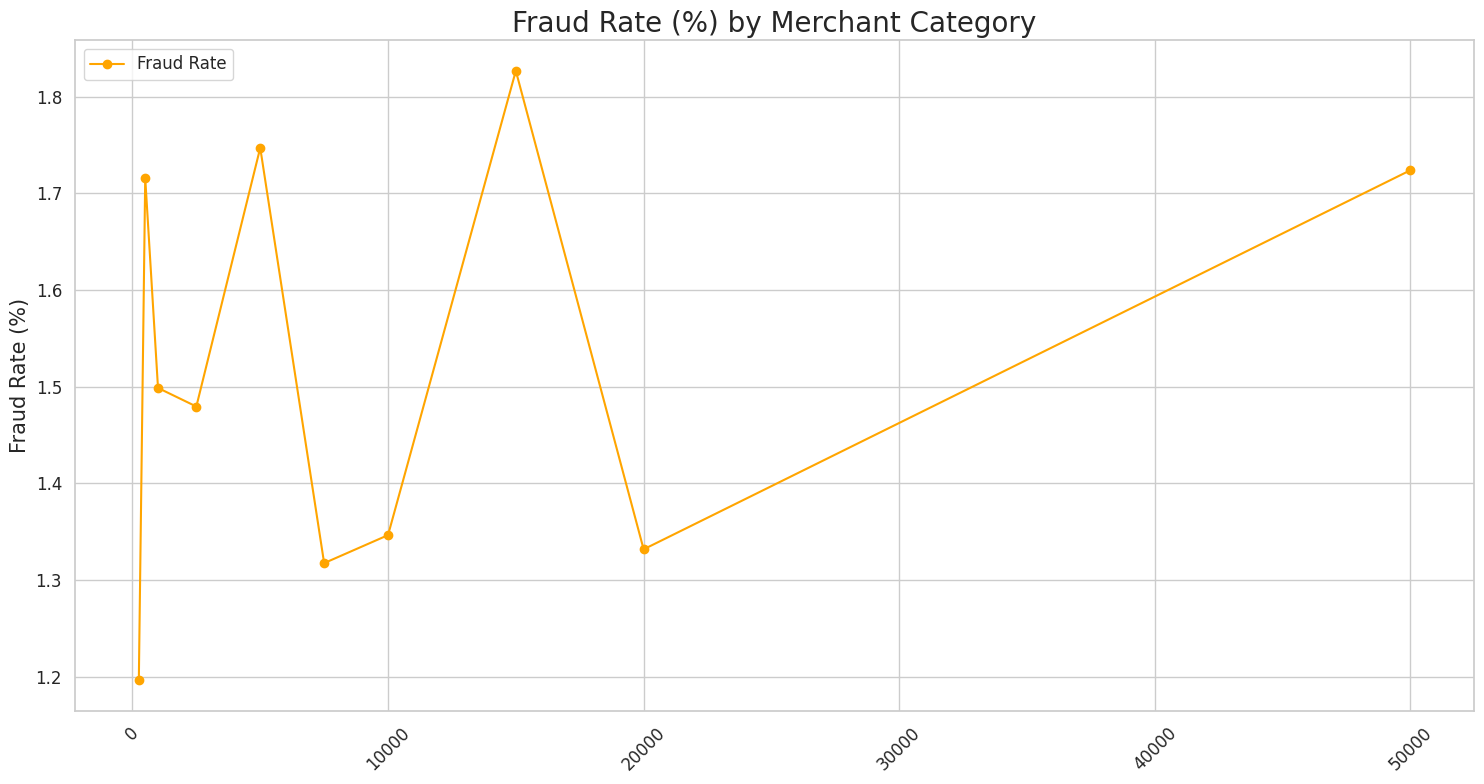

In [37]:
# line plot: fraud rate by Merchant Category

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# plotting line for fraud rate
ax.plot(cl_fraud_summary["creditLimit"], cl_fraud_summary["fraud_rate"], linestyle='-', marker = 'o', color = 'orange', label="Fraud Rate")

ax.set_ylabel('Fraud Rate (%)', fontsize=15)

plt.title("Fraud Rate (%) by Merchant Category", loc='center',fontsize=20)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Adding legends for both y-axes
ax.legend(loc="upper left", fontsize=12)

# Adjust layout to prevent overlap
f.tight_layout()

# Display plot
plt.show()

**3.6 Inspecting boolean columns**

In [116]:
# inspecting cardPresent column

card_fraud_summary = df.groupby('cardPresent').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

card_fraud_summary['fraud_rate'] = (card_fraud_summary['total_fraud'] / card_fraud_summary['total_transactions'])*100
card_fraud_summary = card_fraud_summary.reset_index()
card_fraud_summary = pd.DataFrame(card_fraud_summary)
card_fraud_summary

,cardPresent,total_transactions,total_fraud,fraud_rate
0,False,433495,8962,2.067383
1,True,352868,3455,0.979120


In [118]:
# inspecting expirationDateKeyInMatch column

df['expirationDateKeyInMatch'].value_counts()

exp_fraud_summary = df.groupby('expirationDateKeyInMatch').agg(
    total_transactions=('isFraud', 'count'),
    total_fraud=('isFraud', 'sum')
)

exp_fraud_summary['fraud_rate'] = (exp_fraud_summary['total_fraud'] / exp_fraud_summary['total_transactions'])*100
exp_fraud_summary = exp_fraud_summary.reset_index()
exp_fraud_summary = pd.DataFrame(exp_fraud_summary)
exp_fraud_summary

,expirationDateKeyInMatch,total_transactions,total_fraud,fraud_rate
0,False,785320,12404,1.579484
1,True,1043,13,1.246405


**Observations:**



1.   In transactions where card was not present, fraud rate seems to be high (double) when compared to card transactions.
2.   In transactions where expiration key didn't match, fraud rate is slightly higher.
3. Both of the colummns could be good features for fraud prediction.



# **3.7 Inspecting Target Variable**

In [40]:
# inspecting isFraud
df['isFraud'].value_counts()

,count
isFraud,
False,773946
True,12417


In [119]:
(12417/786363)*100

1.579041740264992

**Observations:**

The number of Fraud instances in the dataset is very less compared to non fraud instances which indicates the imbalanced nature of data.

**Approach:**

To combat class imbalance, i'm use techniques like Oversampling or Undersampling to improve model's predictive power and performance.

# **4. Data Preprocessing**

**4.1 Inspecting reversal transactions**

Approach 1: Transactions where Transaction Type == REVERSAL

In [41]:
reversal_df = df[df['transactionType']=='REVERSAL']

In [42]:
reversal_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
39,574788567,574788567,2500,2200.98,2016-05-24T01:38:03,215.13,Convenient Tire,US,US,09,01,auto,10/2021,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
73,574788567,574788567,2500,2432.72,2016-10-07T10:23:57,3.87,Eazy Repair,US,US,05,01,auto,10/2022,2015-10-13,2015-10-13,579,579,4219,REVERSAL,NaN,67.28,NaN,NaN,NaN,True,NaN,NaN,False,False
101,924729945,924729945,50000,49831.43,2016-10-19T14:01:45,168.57,discount.com,US,US,05,01,online_retail,11/2024,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
133,984504651,984504651,50000,46367.41,2016-01-16T09:53:15,450.74,Planet Fitness #849960,US,US,05,01,health,08/2028,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
156,984504651,984504651,50000,41909.30,2016-01-25T20:39:15,81.73,AMC #724446,US,US,09,01,entertainment,12/2031,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [134]:
reversal_df.shape[0]

20303

In [43]:
reversal_df['transactionAmount'].sum()

2821792.5

Approach 2: Transactions where reversal can be matched with purchase with same merchant, account, transaction amount where 'reversal' is followed by 'purchase'

In [48]:
# Separate purchases and reversals into two DataFrames
purchases = df[df['transactionType'] == 'PURCHASE']
reversals = df[df['transactionType'] == 'REVERSAL']

# Merge to find matching purchase and reversal pairs
merged = pd.merge(
    purchases, reversals,
    on=['accountNumber', 'merchantName', 'transactionAmount'],
    suffixes=('_purchase', '_reversal')
)

# Filter to ensure that the reversal happens after the purchase
reversed_transactions = merged[merged['transactionDateTime_reversal'] > merged['transactionDateTime_purchase']]

In [49]:
reversed_transactions[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime_purchase','transactionType_purchase','transactionDateTime_reversal','transactionType_reversal']]

,accountNumber,merchantName,transactionAmount,transactionDateTime_purchase,transactionType_purchase,transactionDateTime_reversal,transactionType_reversal
0,574788567,Convenient Tire,215.13,2016-05-24T01:35:33,PURCHASE,2016-05-24T01:38:03,REVERSAL
1,924729945,discount.com,168.57,2016-10-04T04:20:04,PURCHASE,2016-10-19T14:01:45,REVERSAL
2,984504651,1st Sandwitch Bar #801388,83.64,2016-01-06T04:08:06,PURCHASE,2016-02-04T00:14:42,REVERSAL
3,984504651,Planet Fitness #849960,450.74,2016-01-16T09:52:30,PURCHASE,2016-01-16T09:53:15,REVERSAL
4,984504651,AMC #724446,81.73,2016-01-17T08:13:08,PURCHASE,2016-01-25T20:39:15,REVERSAL
...,...,...,...,...,...,...,...
18138,205026043,Lyft,56.26,2016-09-18T06:07:17,PURCHASE,2016-09-18T06:08:02,REVERSAL
18139,288358186,ebay.com,20.66,2016-08-02T18:42:42,PURCHASE,2016-08-28T11:21:32,REVERSAL
18140,638498773,KFC #928167,201.79,2016-01-01T19:45:47,PURCHASE,2016-01-01T19:48:03,REVERSAL
18141,638498773,Dunkin' Donuts #396342,86.14,2016-10-09T04:52:23,PURCHASE,2016-11-03T04:23:26,REVERSAL


In [135]:
reversed_transactions.shape[0]

17999

In [137]:
reversed_transactions['transactionAmount'].sum()

2701311.87

**4.2 Inspecting Multi Swipe Transactions**

In [ ]:
sorted_df = df.sort_values(by=['accountNumber', 'merchantName', 'transactionDateTime'], ascending=True)

sorted_df[['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime']]

In [50]:
sorted_df['transactionDateTime'] = pd.to_datetime(sorted_df['transactionDateTime'])

In [51]:
sorted_df['prev_transaction_amount'] = sorted_df.groupby('accountNumber')['transactionAmount'].shift(1)
sorted_df['prev_transaction_datetime'] = sorted_df.groupby('accountNumber')['transactionDateTime'].shift(1)

In [52]:
sorted_df.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54
541951,100088067,100088067,50000,48972.87,2016-09-29 03:23:32,485.92,AMC #552863,US,US,09,01,entertainment,03/2028,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,1027.13,NaN,NaN,NaN,True,NaN,NaN,False,False,304.15,2016-06-03 18:50:55
541958,100088067,100088067,50000,48803.33,2016-10-27 10:32:16,53.45,AMC #552863,US,US,02,01,entertainment,01/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,1196.67,NaN,NaN,NaN,True,NaN,NaN,False,False,485.92,2016-09-29 03:23:32
541909,100088067,100088067,50000,49421.28,2016-02-21 01:14:56,71.35,AMC #724446,US,US,09,01,entertainment,03/2024,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,578.72,NaN,NaN,NaN,True,NaN,NaN,True,False,53.45,2016-10-27 10:32:16
541946,100088067,100088067,50000,49863.35,2016-09-18 06:13:27,55.04,AMC #724446,US,US,05,01,entertainment,07/2032,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,136.65,NaN,NaN,NaN,True,NaN,NaN,False,False,71.35,2016-02-21 01:14:56
541954,100088067,100088067,50000,49935.63,2016-10-10 07:15:50,249.19,AMC #724446,US,US,02,01,entertainment,08/2027,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,64.37,NaN,NaN,NaN,True,NaN,NaN,False,False,55.04,2016-09-18 06:13:27


In [132]:
time_window = timedelta(minutes=5)

sorted_df['isMultiSwipe'] = ((sorted_df['transactionAmount'] == sorted_df['prev_transaction_amount']) &
                            (sorted_df['transactionDateTime'] - sorted_df['prev_transaction_datetime'] <= time_window))

In [133]:
multi_swipe_df = sorted_df[sorted_df['isMultiSwipe'] == True]
multi_swipe_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541964,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,01,entertainment,06/2020,2014-01-09,2014-01-09,546,546,4615,REVERSAL,NaN,188.12,NaN,NaN,NaN,True,NaN,NaN,False,False,22.32,2016-11-20 07:57:05,True
541956,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,08,online_gifts,12/2019,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,724.91,NaN,NaN,NaN,False,NaN,NaN,False,False,411.35,2016-10-16 18:01:00,True
87920,100328049,100328049,5000,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,08,rideshare,05/2027,2014-01-07,2014-01-07,206,206,2941,REVERSAL,NaN,394.90,NaN,NaN,NaN,False,NaN,NaN,False,False,43.74,2016-01-15 20:34:35,True
151518,100737756,100737756,250,177.98,2016-07-10 14:32:06,43.25,34th BBQ #166379,US,US,02,01,food,03/2029,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,72.02,NaN,NaN,NaN,True,NaN,NaN,False,False,43.25,2016-07-10 14:31:07,True
151427,100737756,100737756,250,-44.75,2016-01-18 01:55:28,693.50,Franks Deli,US,US,05,01,food,03/2025,2015-06-21,2015-06-21,463,463,4317,PURCHASE,NaN,294.75,NaN,NaN,NaN,True,NaN,NaN,False,False,693.50,2016-01-18 01:55:24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569654,999257059,999257059,15000,14177.84,2016-01-14 16:51:22,47.58,Wall Street News,US,US,09,01,subscriptions,12/2019,2015-10-25,2015-10-25,959,959,8291,PURCHASE,NaN,822.16,NaN,NaN,NaN,False,NaN,NaN,False,False,47.58,2016-01-14 16:48:41,True
569751,999257059,999257059,15000,14322.20,2016-08-09 11:25:46,557.11,Washington Times,US,US,05,01,subscriptions,05/2032,2015-10-25,2015-10-25,959,959,8291,REVERSAL,NaN,677.80,NaN,NaN,NaN,False,NaN,NaN,False,False,557.11,2016-08-09 11:25:29,True
545536,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,01,rideshare,03/2020,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,753.18,NaN,NaN,NaN,False,NaN,NaN,False,False,367.13,2016-03-16 07:13:48,True
545581,999258704,999258704,5000,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,01,online_retail,05/2025,2015-12-22,2015-12-22,708,708,3757,REVERSAL,NaN,134.83,NaN,NaN,NaN,False,NaN,NaN,False,False,72.93,2016-09-02 03:31:57,True


In [129]:
multi_swipe_df.shape[0]

13492

In [55]:
multi_swipe_df.transactionAmount.sum()

1931990.0399999998

In [56]:
sorted_df[(sorted_df['accountNumber']==100088067) & (sorted_df['transactionAmount']== 411.35)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
541955,100088067,Fresh Flowers,411.35,2016-10-16 18:01:00,21.59,2016-09-02 03:40:54,PURCHASE,False
541956,100088067,Fresh Flowers,411.35,2016-10-16 18:01:02,411.35,2016-10-16 18:01:00,PURCHASE,True


In [57]:
sorted_df[(sorted_df['accountNumber']==100737756) & (sorted_df['transactionAmount']== 693.50)][['accountNumber',  'merchantName', 'transactionAmount', 'transactionDateTime','prev_transaction_amount','prev_transaction_datetime','transactionType','isMultiSwipe']]

,accountNumber,merchantName,transactionAmount,transactionDateTime,prev_transaction_amount,prev_transaction_datetime,transactionType,isMultiSwipe
151426,100737756,Franks Deli,693.5,2016-01-18 01:55:24,83.32,2016-12-11 20:11:14,PURCHASE,False
151427,100737756,Franks Deli,693.5,2016-01-18 01:55:28,693.50,2016-01-18 01:55:24,PURCHASE,True
151428,100737756,Franks Deli,693.5,2016-01-18 01:58:26,693.50,2016-01-18 01:55:28,PURCHASE,True


## **5. Data Cleaning**

In [58]:
clean_df = sorted_df[sorted_df['isMultiSwipe'] == False]
clean_df = clean_df[clean_df['transactionType'] == 'PURCHASE']

In [59]:
clean_df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,prev_transaction_amount,prev_transaction_datetime,isMultiSwipe
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,46.19,NaN,NaN,NaN,True,NaN,NaN,False,False,NaN,NaT,False
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,NaN,70.69,NaN,NaN,NaN,True,NaN,NaN,False,False,200.12,2016-04-08 19:56:36,False
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,3.96,NaN,NaN,NaN,True,NaN,NaN,False,False,95.11,2016-11-09 07:26:06,False
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,66.07,NaN,NaN,NaN,True,NaN,NaN,False,False,5.26,2016-05-06 02:54:01,False
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False,141.60,2016-02-03 04:48:54,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108113,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,325.92,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-09-22 13:58:30,False
108114,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,305.54,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-10-23 16:47:41,False
108115,999389635,999389635,5000,4714.84,2016-12-24 05:19:30,4.62,Play Store,US,US,05,01,mobileapps,04/2033,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,285.16,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-11-24 00:21:46,False
108109,999389635,999389635,5000,4943.92,2016-08-04 20:27:36,42.98,oldnavy.com,US,US,09,01,online_retail,07/2023,2015-10-09,2015-10-09,140,140,3991,PURCHASE,NaN,56.08,NaN,NaN,NaN,False,NaN,NaN,False,False,4.62,2016-12-24 05:19:30,False


In [60]:
clean_df.drop(columns=['prev_transaction_amount', 'prev_transaction_datetime', 'isMultiSwipe','recurringAuthInd','posOnPremises',
                       'merchantZip','merchantState','merchantCity','echoBuffer'], inplace=True)

In [61]:
clean_df.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'currentBalance', 'cardPresent',
       'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [62]:
clean_df = clean_df.dropna()

In [63]:
clean_df.shape

(729280, 23)


# **6. Feature Engineering**

In [64]:
transform_df = clean_df.copy()

In [65]:
transform_df['utilization_ratio'] = transform_df['currentBalance'] / transform_df['creditLimit']

In [66]:
transform_df['cvv_match'] = transform_df['cardCVV'] == transform_df['enteredCVV']

In [67]:
transform_df['country_match'] = transform_df['acqCountry'] == transform_df['merchantCountryCode']

In [68]:
transform_df['accountOpenDate'] = pd.to_datetime(transform_df['accountOpenDate'])
transform_df['dateOfLastAddressChange'] = pd.to_datetime(transform_df['dateOfLastAddressChange'])

In [69]:
# define threshold
days_threshold = pd.Timedelta(days=30)

# Feature 1: Account opened within the last 30 days of the transaction
transform_df['recent_account_open'] = (transform_df['transactionDateTime'] - transform_df['accountOpenDate']) <= days_threshold

# Feature 2: Address changed within the last 30 days of the transaction
transform_df['recent_address_change'] = (transform_df['transactionDateTime'] - transform_df['dateOfLastAddressChange']) <= days_threshold

In [70]:
transform_df['transaction_hour'] = transform_df['transactionDateTime'].dt.hour

In [71]:
transform_df['transaction_day_of_week'] = transform_df['transactionDateTime'].dt.dayofweek

In [72]:
transform_df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week
541917,100088067,100088067,50000,49953.81,2016-04-08 19:56:36,200.12,1st BBQ,US,US,09,01,food,07/2029,2014-01-09,2014-01-09,546,546,4615,PURCHASE,46.19,True,False,False,0.000924,True,True,False,False,19,4
541962,100088067,100088067,50000,49929.31,2016-11-09 07:26:06,95.11,1st Pub,US,US,02,01,food,04/2021,2014-01-09,2014-01-09,402,402,2077,PURCHASE,70.69,True,False,False,0.001414,True,True,False,False,7,2
541920,100088067,100088067,50000,49996.04,2016-05-06 02:54:01,5.26,1st Sandwitch Bar #758805,US,US,02,01,food,07/2033,2014-01-09,2014-01-09,546,546,4615,PURCHASE,3.96,True,False,False,0.000079,True,True,False,False,2,4
541904,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,08,food,11/2030,2014-01-09,2014-01-09,546,546,4615,PURCHASE,66.07,True,False,False,0.001321,True,True,False,False,4,2
541925,100088067,100088067,50000,50000.00,2016-06-03 18:50:55,304.15,AMC #191138,US,US,02,01,entertainment,11/2032,2014-01-09,2014-01-09,546,546,4615,PURCHASE,0.00,True,False,False,0.000000,True,True,False,False,18,4


In [73]:
transform_df.drop(columns=['accountNumber','customerId','merchantName','cardLast4Digits','accountOpenDate','dateOfLastAddressChange','cardCVV','currentExpDate','enteredCVV','currentBalance','transactionDateTime','transactionType','acqCountry'], inplace=True)

In [74]:
transform_df.head()

,creditLimit,availableMoney,transactionAmount,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week
541917,50000,49953.81,200.12,US,09,01,food,True,False,False,0.000924,True,True,False,False,19,4
541962,50000,49929.31,95.11,US,02,01,food,True,False,False,0.001414,True,True,False,False,7,2
541920,50000,49996.04,5.26,US,02,01,food,True,False,False,0.000079,True,True,False,False,2,4
541904,50000,49933.93,141.60,US,09,08,food,True,False,False,0.001321,True,True,False,False,4,2
541925,50000,50000.00,304.15,US,02,01,entertainment,True,False,False,0.000000,True,True,False,False,18,4


In [75]:
transform_df.shape

(729280, 17)

In [76]:
transform_df.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount',
       'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'cardPresent', 'expirationDateKeyInMatch',
       'isFraud', 'utilization_ratio', 'cvv_match', 'country_match',
       'recent_account_open', 'recent_address_change', 'transaction_hour',
       'transaction_day_of_week'],
      dtype='object')

# **7. Feature Transformation**

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc, make_scorer, confusion_matrix, accuracy_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import lightgbm as lgb

**7.1 One Hot Encoding**

In [78]:
# One-hot encoding for categorical columns
categorical_columns = ['merchantCountryCode', 'merchantCategoryCode']
transform_df = pd.get_dummies(transform_df, columns=categorical_columns, drop_first=True)

In [79]:
# encoding for boolean columns
boolean_columns = ['cardPresent', 'expirationDateKeyInMatch', 'cvv_match', 'country_match',
                   'recent_account_open', 'recent_address_change','isFraud']

transform_df[boolean_columns] = transform_df[boolean_columns].astype(int)

In [80]:
transform_df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardPresent,expirationDateKeyInMatch,isFraud,utilization_ratio,cvv_match,country_match,recent_account_open,recent_address_change,transaction_hour,transaction_day_of_week,merchantCountryCode_MEX,merchantCountryCode_PR,merchantCountryCode_US,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions
541917,50000,49953.81,200.12,09,01,1,0,0,0.000924,1,1,0,0,19,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541962,50000,49929.31,95.11,02,01,1,0,0,0.001414,1,1,0,0,7,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541920,50000,49996.04,5.26,02,01,1,0,0,0.000079,1,1,0,0,2,4,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541904,50000,49933.93,141.60,09,08,1,0,0,0.001321,1,1,0,0,4,2,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
541925,50000,50000.00,304.15,02,01,1,0,0,0.000000,1,1,0,0,18,4,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**7.2 Removing Target variables and Features**

In [81]:
# removing target variable and reassigning it to y
X=transform_df.drop('isFraud',axis=1).values
y=transform_df['isFraud']

**7.3 Scaling numerical columns**

In [82]:
# apply RobustScaler to handle skewness and outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

**7.4 Test Train Split**

In [83]:
# perform train test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

**7.5 Using SMOTE to handle class imbalance**

In [84]:
# applying SMOTE to minority class
#smote = SMOTE(random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [85]:
#X_train_resampled.shape

In [86]:
#y_train_resampled.shape

In [87]:
from imblearn.under_sampling import ClusterCentroids

# Initialize and apply ClusterCentroids
cc = ClusterCentroids(random_state=42)
X_train_resampled, y_train_resampled = cc.fit_resample(X_train, y_train)

In [88]:
X_train_resampled.shape

(17106, 35)

In [89]:
y_train_resampled.shape

(17106,)

# **8. Modelling**

**8.1 Logistic Regression**

In [90]:
logit = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)

In [91]:
param_grid = {
    'C': [1, 10, 100, 200, 500],
    'penalty': ['l1', 'l2']
}

In [92]:
# Using F1 Score as the scoring metric for imbalanced data
logit_clf = GridSearchCV(logit, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
logit_clf.fit(X_train_resampled, y_train_resampled)

# Display the best parameters from Grid Search
print("Best Parameters from Grid Search:", logit_clf.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from Grid Search: {'C': 100, 'penalty': 'l1'}


In [93]:
# Use the best parameters to initialize Logistic Regression
best_logit = LogisticRegression(
    penalty=logit_clf.best_params_['penalty'],
    C=logit_clf.best_params_['C'],
    class_weight='balanced',
    solver='liblinear',
    max_iter=1000
)
best_logit.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [94]:
# Predictions on the test set
y_pred = best_logit.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Test Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.54      0.70    179469
           1       0.02      0.70      0.05      2851

    accuracy                           0.54    182320
   macro avg       0.51      0.62      0.37    182320
weighted avg       0.98      0.54      0.69    182320

Test Accuracy: 0.5420


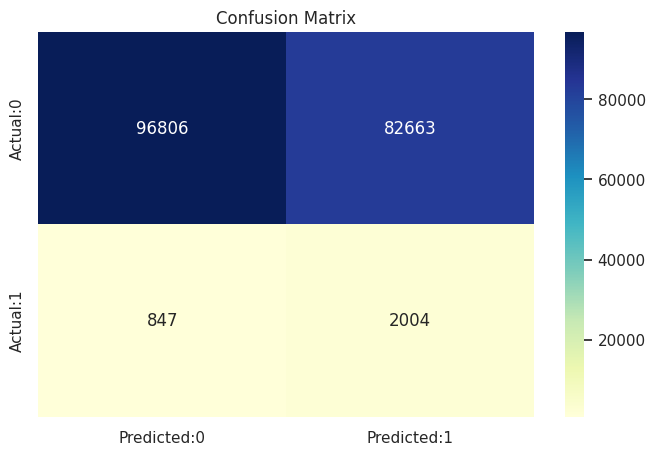

In [95]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0315


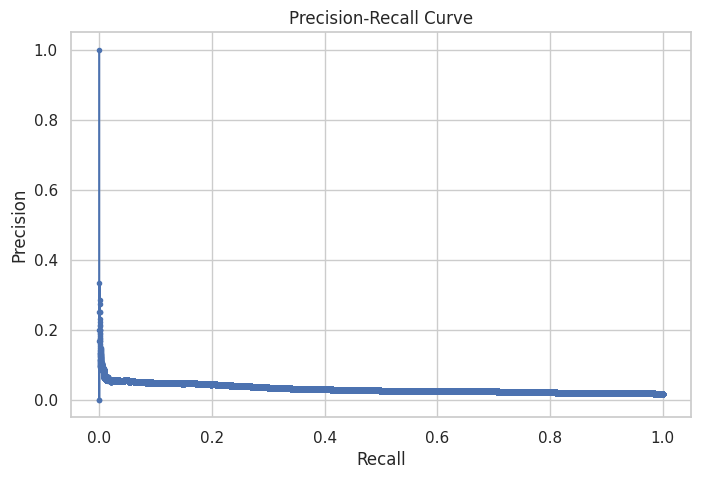

In [96]:
# Predicted probabilities for the positive class
y_scores = best_logit.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [97]:
cv_score = cross_val_score(best_logit, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation F1 Scores:", cv_score)
print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.68049113 0.67408851 0.68526786 0.67792793 0.68857939]
Average Cross-validation F1 Score: 0.6813


**8.2 Random Forest**

In [98]:
rf = RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [99]:
# define hyperparameter grid
param_grid = {
    'n_estimators': [5, 10,15, 20],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [100]:
# Using F1 Score as the scoring metric for imbalanced data
rf_clf = GridSearchCV(rf, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
rf_clf.fit(X_train_resampled, y_train_resampled)

# Display best parameters
print("Best Parameters from Grid Search:", rf_clf.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters from Grid Search: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 15}


In [101]:
# Initialize with best parameters and train
best_rf = RandomForestClassifier(
    n_estimators=rf_clf.best_params_['n_estimators'],
    max_depth=rf_clf.best_params_['max_depth'],
    min_samples_split=rf_clf.best_params_['min_samples_split'],
    class_weight='balanced_subsample',
    random_state=42
)
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_split=5, n_estimators=15, random_state=42)

In [102]:
# Predictions on the test set
y_pred = best_rf.predict(X_test)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.07      0.13    179469
           1       0.02      0.98      0.03      2851

    accuracy                           0.09    182320
   macro avg       0.51      0.52      0.08    182320
weighted avg       0.98      0.09      0.13    182320



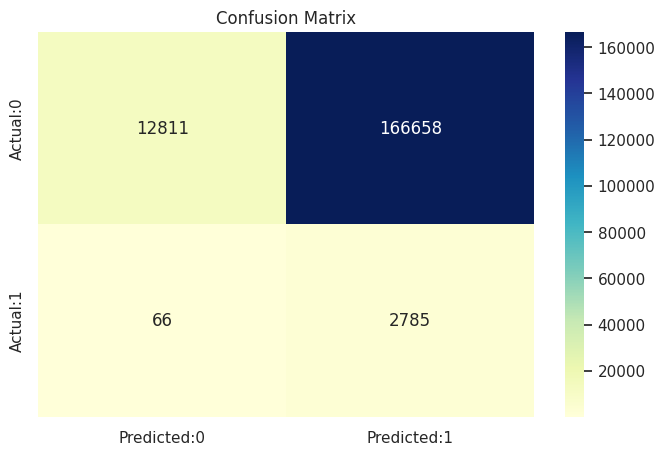

In [103]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0205


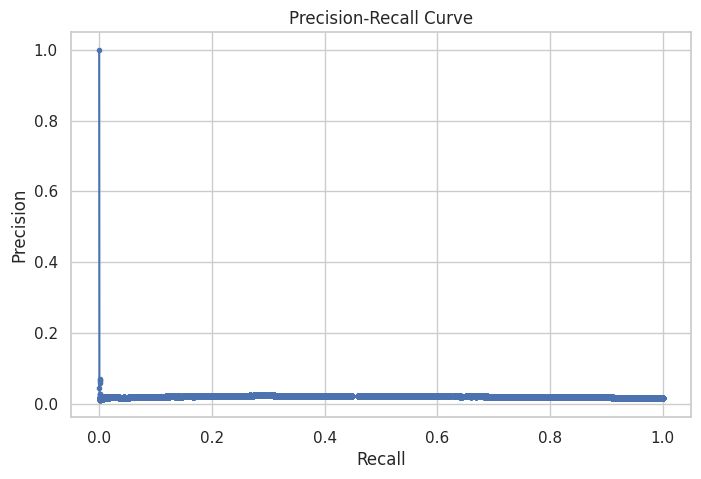

In [104]:
# Predicted probabilities for the positive class
y_scores = best_rf.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [105]:
cv_score = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation F1 Scores:", cv_score)
print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.94769579 0.95112889 0.95270462 0.96135127 0.9625    ]
Average Cross-validation F1 Score: 0.9551


**8.3 XGBoost**

In [106]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, eval_metric="auc")

In [107]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, 10, 20]
}

In [108]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1}


In [109]:
# Train with the best parameters from grid search
xgb_best = xgb.XGBClassifier(**best_params, objective='binary:logistic', random_state=42, eval_metric="auc")
xgb_best.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [110]:
# Predictions
y_pred_xgb = xgb_best.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.03    179469
           1       0.02      1.00      0.03      2851

    accuracy                           0.03    182320
   macro avg       0.51      0.51      0.03    182320
weighted avg       0.98      0.03      0.03    182320



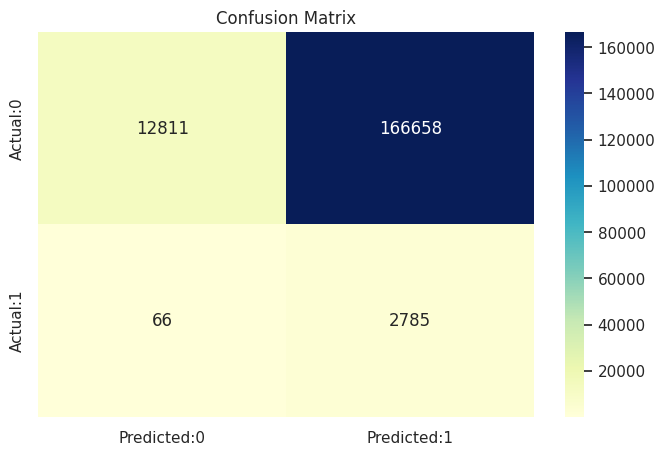

In [111]:
cm_xgb = confusion_matrix(y_test, y_pred)
conf_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0239


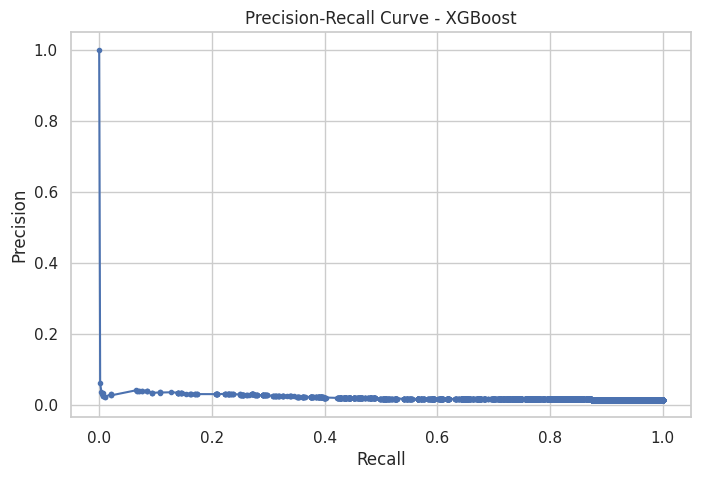

In [112]:
# Predicted probabilities for the positive class
y_pred_proba = xgb_best.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.show()

In [113]:
cv_score = cross_val_score(xgb_best, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
print("Cross-validation F1 Scores:", cv_score)
print("Average Cross-validation F1 Score: {:.4f}".format(cv_score.mean()))

Cross-validation F1 Scores: [0.99970786 0.99941555 0.99854015 0.99941589 0.99883246]
Average Cross-validation F1 Score: 0.9992


**8.4 LightBGM**

In [141]:
# Define LightGBM parameters
param_grid = {
    'num_leaves': [5,10,15],
    'max_depth': [-1,3, 5, 10],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [25, 50, 100],
    'scale_pos_weight': [y_train.value_counts()[0] / y_train.value_counts()[1]]
}

# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', random_state=42)

In [142]:
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

[LightGBM] [Info] Number of positive: 8553, number of negative: 538407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 546960, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015637 -> initscore=-4.142333
[LightGBM] [Info] Start training from score -4.142333
Best parameters found:  {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 15, 'scale_pos_weight': 62.949491406524025}


In [143]:
lgb_best = lgb.LGBMClassifier(**best_params, boosting_type='gbdt', objective='binary', random_state=42)
lgb_best.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 8553, number of negative: 538407
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 868
[LightGBM] [Info] Number of data points in the train set: 546960, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.015637 -> initscore=-4.142333
[LightGBM] [Info] Start training from score -4.142333


LGBMClassifier(learning_rate=0.05, num_leaves=15, objective='binary',
               random_state=42, scale_pos_weight=62.949491406524025)

In [144]:
# Make predictions
y_pred_lgb = lgb_best.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.99      0.70      0.82    179469
           1       0.03      0.68      0.07      2851

    accuracy                           0.70    182320
   macro avg       0.51      0.69      0.44    182320
weighted avg       0.98      0.70      0.81    182320



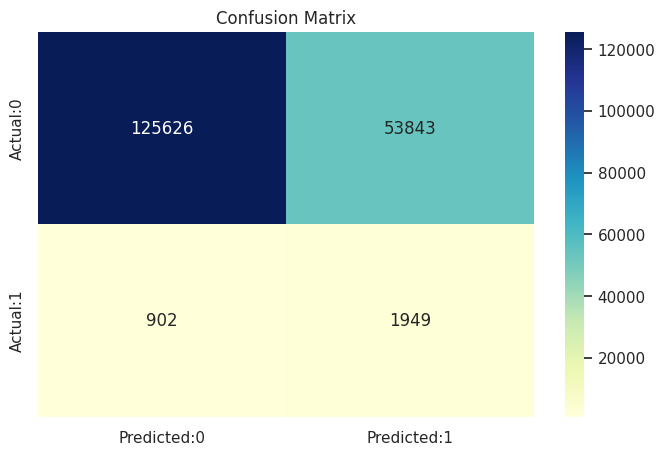

In [145]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
conf_matrix_lgb = pd.DataFrame(data=cm_lgb, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plotting Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

Precision-Recall AUC: 0.0502


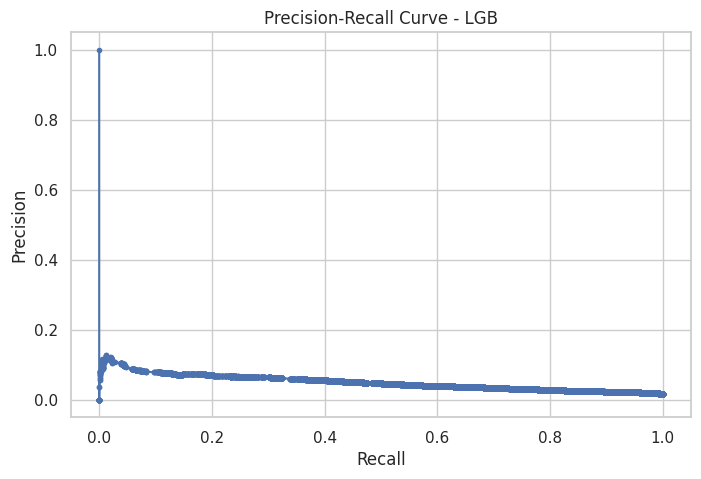

In [146]:
# Predicted probabilities for the positive class
y_pred_proba = lgb_best.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - LGB")
plt.show()